In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Process Input

In [2]:
census = pd.read_csv('census_income_learn.csv', header=None)
census.columns = ['AGE', 'CLSWKR', 'INDUSTRY', 'OCCUPATION', 'EDU', 'WAGE', 'SCHOOL ATTENDING', 
                  'MARRIAGE', 'INDUSTRY', 'OCCUPATION', 'RACE', 'HISPANIC ORI', 'SEX', 'MEM UNION', 
                  'UNEMPLOY REASON', 'EMPLOYMENT STATUS', 'CAPGAIN', 'CAPLOSS' , 'DIVIDENT',
                  'FEDTAX', 'TAX FILLER', 'PREVIOUS STATE', 'HOUSEHOLD STATUS', 
                  'FAMILY STATUS', 'WEIGHT', 'MIGRANT  (MSA)', 'MIGRANT (REG)', 
                  'MIGRANT (WITHIN REG)', 'LIVE IN HOUSE', 'LIVE IN SUNBELT', 'NUM EMPLOYEES', 
                  'PARENT PRESENTED', 'FATHER COUNTRY', 'MOTHER COUNTRY', 'SELF COUNTRY',
                  'CITIZEN', 'OWN BUSINESS', 'VETERAN QUESIONAIRES', 'VETERAN BENEFIT', 
                  'WORK WEEKs IN YEAR', 'YEAR', 'EARN']

print(census.head(5))
print(census.info())

   AGE                           CLSWKR INDUSTRY OCCUPATION  \
0   73                  Not in universe        0          0   
1   58   Self-employed-not incorporated        4         34   
2   18                  Not in universe        0          0   
3    9                  Not in universe        0          0   
4   10                  Not in universe        0          0   

                           EDU  WAGE  SCHOOL ATTENDING        MARRIAGE  \
0         High school graduate     0   Not in universe         Widowed   
1   Some college but no degree     0   Not in universe        Divorced   
2                   10th grade     0       High school   Never married   
3                     Children     0   Not in universe   Never married   
4                     Children     0   Not in universe   Never married   

                       INDUSTRY                            OCCUPATION  \
0   Not in universe or children                       Not in universe   
1                  Constructio

In [3]:
# Some general statistics
census.describe()

,AGE,WAGE,CAPGAIN,CAPLOSS,DIVIDENT,WEIGHT,NUM EMPLOYEES,OWN BUSINESS,VETERAN BENEFIT,WORK WEEKs IN YEAR,YEAR
count,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


There are 13 columns with numeric values. In these 13 columns, there are no missing values. I will use these first 13 columns for inital model. Will include more features if the accuracy is low. More inspection in row 42th, which is the role of the label. 

Change the 'EARN' row to [1, 0] for classification

In [4]:
def processInput(data):
    # Labels
    data.loc[data['EARN'] == ' - 50000.', 'EARN'] = 0
    data.loc[data['EARN'] == ' 50000+.', 'EARN'] = 1
    
    data['CAP NET'] = (data['CAPGAIN'] - data['CAPLOSS'])
    
    data.loc[data['SEX'] == ' Male', 'SEX'] = 1
    data.loc[data['SEX'] == ' Female', 'SEX'] = 0

In [5]:
print(census['EARN'].unique())
processInput(census)
print(census['EARN'].unique())

[' - 50000.' ' 50000+.']
[0 1]


In [6]:
# The data is heavily skewed toward not making 50,000. If the model only predict 0, then it has the accuracy of
print(census['EARN'].value_counts())
print(float(187141)/199523)

0    187141
1     12382
Name: EARN, dtype: int64
0.93794199165


# Simple Logistic Regression

In [13]:
#Logistic Regression
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

predictors = ["AGE", "WAGE", "DIVIDENT", "SEX", "NUM EMPLOYEES", "CAP NET", "OWN BUSINESS", 
              "VETERAN BENEFIT", "WORK WEEKs IN YEAR"]

alg = LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds
scores = cross_validation.cross_val_score(alg, census[predictors], list(census["EARN"]), cv=3)
# Take the mean of the scores
print(scores.mean())

0.944297152657


# Random Forest 

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)

scores = cross_validation.cross_val_score(alg, census[predictors], list(census["EARN"]), cv=3)

print(scores.mean())

0.945349654906


# Find Best Features using SelectKBest

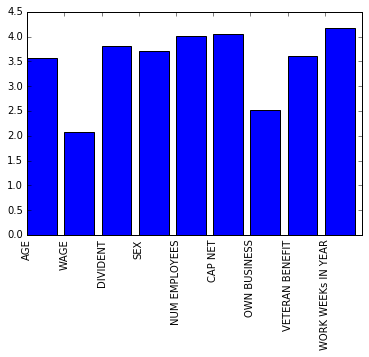

[  3744.14826079    120.11068679   6361.44175427   5082.5266498
  10410.10044403  11312.16726281    327.3568264    4043.02701903
  14743.48690843]


In [26]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

selector = SelectKBest(f_classif, k="all")
selector.fit(census[predictors], census["EARN"])

#scores = -np.log10(selector.pvalues_)
scores = np.log10(selector.scores_)

# Plot the scores. 
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

print(selector.scores_)

Only the 'Wage' and 'OWN BUSINESS' features are the best features from the graph and we redo the logistic regression and random forest with these 2 features.

In [27]:
predictors = ["AGE", "DIVIDENT", "SEX", "NUM EMPLOYEES", "CAP NET", 
              "VETERAN BENEFIT", "WORK WEEKs IN YEAR"]

alg = LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds
scores = cross_validation.cross_val_score(alg, census[predictors], list(census["EARN"]), cv=3)
# Take the mean of the scores
print(scores.mean())

0.944221973355


In [28]:
predictors = ["AGE", "DIVIDENT", "SEX", "NUM EMPLOYEES", "CAP NET", 
              "VETERAN BENEFIT", "WORK WEEKs IN YEAR"]

alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)
scores = cross_validation.cross_val_score(alg, census[predictors], list(census["EARN"]), cv=3)

print(scores.mean())

0.946156584345
